### Instalações

In [2]:
## Instalação da biblioteca
!pip install -q deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.5 MB/s eta 0:00:00


### Bibliotecas

In [3]:
## Importando bibliotecas necessárias
from deap import base, creator, tools

import random
import matplotlib.pyplot as plt

### Aprendendo básico do DEAP

In [4]:
## Definindo a classe fitness
creator.create(name = 'FitnessMax',
               base = base.Fitness,
               weights = (1.,))

In [5]:
## Definindo a classe individual
creator.create(name = 'Individual',
               base = list,
               fitness = creator.FitnessMax)

In [6]:
## Instanciando classe Toolbox
toolbox = base.Toolbox()
## Definindo alguns operadores genéticos
toolbox.register(alias = 'select',
                 function = tools.selTournament,
                 tournsize = 3)

toolbox.register(alias = 'mate',
                 function = tools.cxTwoPoint) # executar o crossover de dois pontos

toolbox.register(alias = 'mutate',
                 function = tools.mutFlipBit, # inversão de bit na mutação
                 indpb = .02) # probabilidade

**Alguns dos operadores implementados**

1. Funções de seleção. Podem ser encontradas no arquivo `selection.py`.

* selRoulette() - implements roulette wheel selection.
* selStochasticUniversalSampling() - implements Stochastic Universal
Sampling (SUS).
* selTournament() - implements tournament selection.

2. Funções de crossover. Podem ser encontradas no arquivo `crossover.py`:

* cxOnePoint() - implements single-point crossover.
* cxUniform() - implements uniform crossover.
* cxOrdered() - implements ordered crossover (OX1).
* cxPartialyMatched() - implements partially matched crossover (PMX).

3. Funções de mutação. Podem ser encontradas no arquivo `mutation.py`:

* mutFlipBit() - implements flip bit mutation.
* mutGaussian() - implements normally distributed mutation.

In [7]:
## Criando a população
# exemplo da criação de 10 números aleatórios entre [0,1]
random_list_ex1 = tools.initRepeat(container = list,
                                   func = random.random,
                                   n = 10)
random_list_ex1

[0.7196288070812469,
 0.4891382496078841,
 0.26065594580666407,
 0.405864050230748,
 0.49770733042258997,
 0.1553723299949188,
 0.00305941668362808,
 0.9377669722072647,
 0.890943204249836,
 0.8009700481315459]

In [8]:
# exemplo da criação de uma função que será utilizada na execução da função `initRepeat`.
# Nesse caso, será utilizado uma função para geração aleatória de números inteiros

# Modo 1:
def zero_or_one():
  return random.randint(0, 1)

random_list_ex2 = tools.initRepeat(container = list,
                                   func = zero_or_one,
                                   n = 10)
random_list_ex2

[1, 0, 1, 0, 1, 0, 0, 0, 0, 0]

In [9]:
# Modo 2
toolbox.register(alias = 'zeroOrOne',
                 function = random.randint,
                 a = 0, b = 1) # parametros da função randint

random_list_ex3 = tools.initRepeat(container = list,
                                   func = toolbox.zeroOrOne,
                                   n = 10)

random_list_ex3

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]

### OneMax Problem

Considerado o *Hello world* dos algoritmos genéticos.

O objetivo é encontrar uma string binária de um dado tamanho que maximize a soma dos seus dígitos. Um exemplo do problema para um tamanho de 5 dígitos considerará o seguinte:

- 10010 (soma de dígitos = 2)
- 01110 (soma de dígitos = 3)
- 11111 (soma de dígitos = 5)

Claro que o resultado é obvio para nós, sendo uma string com todos dígitos iguais a 1, porém para o AG não o é.

**Definindo constantes**

In [10]:
## Tamanho da string de bits para ser otimizado
ONE_MAX_LENGTH = 100

## Número de individuos na população
POPULATION_SIZE = 200
## Probabilidade do crossover
P_CROSSOVER = 0.9
## Probabilidade da mutação de um indivíduo
P_MUTATION = 0.1
## Número máximo de gerações
MAX_GENERATIONS = 50

## Definindo uma seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

**Definindo Toolbox**

In [11]:
toolbox = base.Toolbox()
toolbox.register(alias = 'zeroOrOne',
                 function = random.randint,
                 a = 0, b = 1)

**Definindo a classe Fitness**

In [12]:
creator.create(name = 'FitnessMax',
               base = base.Fitness,
               weights = (1., ))

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


**Definindo a classe Individual**

In [13]:
creator.create(name = 'Individual',
               base = list,
               fitness = creator.FitnessMax)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


**Definindo registro IndividualCreator para criar as instâncias da classe Individual**

In [14]:
toolbox.register('individualCreator',
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.zeroOrOne,
                 ONE_MAX_LENGTH)

**Definindo o registro PopulationCreator para criar uma lista de indivíduos**

In [15]:
toolbox.register('populationCreator',
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

**Definindo cálculo do fitness por indivíduo**

In [16]:
def oneMaxFitness(individual: list) -> int:
  return sum(individual) , # os valores de fitness no DEAP são tuplas, por isso da vírgula

In [17]:
toolbox.register(alias = 'evaluate',
                 function = oneMaxFitness)

**Definindo operadores genéticos**

In [18]:
toolbox.register(alias = 'select',
                 function = tools.selTournament,
                 tournsize = 3)
toolbox.register(alias = 'mate',
                 function = tools.cxOnePoint)
toolbox.register(alias = 'mutate',
                 function = tools.mutFlipBit,
                 indpb = 1./ONE_MAX_LENGTH)

**Fluxo de treinamento**

- Geração 1: Max Fitness = 63.0, Avg Fitness = 54.075
Melhor indivíduo =  0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 

- Geração 2: Max Fitness = 67.0, Avg Fitness = 57.095
Melhor indivíduo =  1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 

- Geração 3: Max Fitness = 71.0, Avg Fitness = 60.595
Melhor indivíduo =  1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 

- Geração 4: Max Fitness = 73.0, Avg Fitness = 63.78
Melhor indivíduo =  1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1

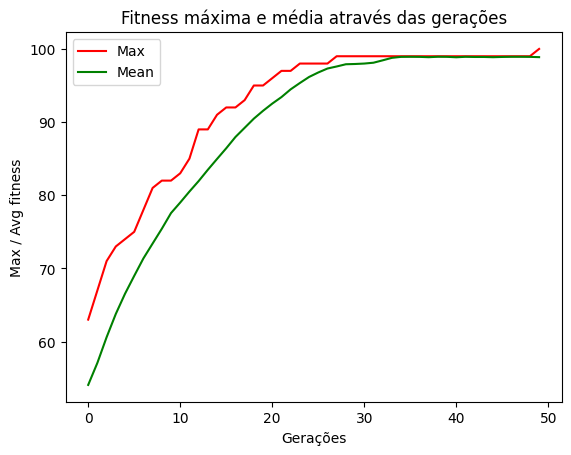

In [20]:
## 1. Criação da população
population = toolbox.populationCreator(n = POPULATION_SIZE)
generation_counter = 0

## 2. Calculando fitness para cada individuo da população inicial
fitness_values = list(map(toolbox.evaluate, population))

## 3. Relacionando o fitness values para cada individuo
for individual, fitness_value in zip(population, fitness_values):
  individual.fitness.values = fitness_value

## 4. Tratamento para caso haja fitness com valores unitários
fitness_values = [individual.fitness.values[0] for individual in population]

## 5. Inicializando listas das estatísticas
max_fitness_values = []
mean_fitness_values = []

## 6. Loop da otimização
while max(fitness_values) < ONE_MAX_LENGTH and generation_counter < MAX_GENERATIONS:
  ## atualizando contador
  generation_counter += 1
  ## seleção
  offspring = toolbox.select(population, len(population))
  ## clonando lista dos selecionados para que as operações genéticas não afetem a população original
  offspring = list(map(toolbox.clone, offspring))
  ## crossover
  for child1, child2 in zip(offspring[::2], offspring[1::2]):
    if random.random() < P_CROSSOVER:
      toolbox.mate(child1, child2)
      del child1.fitness.values
      del child2.fitness.values
  ## mutação
  for mutant in offspring:
    if random.random() < P_MUTATION:
      toolbox.mutate(mutant)
      del mutant.fitness.values
  ## recalculando o valor do fitness para os individuos que sofreram alteração de crossover ou mutação
  fresh_individuals = [ind for ind in offspring if not ind.fitness.valid]
  fresh_fitness_values = list(map(toolbox.evaluate, fresh_individuals))
  for individual, fitness_value in zip(fresh_individuals, fresh_fitness_values):
    individual.fitness.values = fitness_value
  ## atualizando a população
  population[:] = offspring
  ## coletando estatisticas da otimização
  fitness_values = [ind.fitness.values[0] for ind in population]
  max_fitness = max(fitness_values)
  mean_fitness = sum(fitness_values) / len(population)

  max_fitness_values.append(max_fitness)
  mean_fitness_values.append(mean_fitness)

  print("- Geração {}: Max Fitness = {}, Avg Fitness = {}".format(generation_counter, max_fitness, mean_fitness))
  ## localizando e printando o melhor individuo
  best_index = fitness_values.index(max(fitness_values))
  print("Melhor indivíduo = ", *population[best_index], "\n")

## 7. Visualizando otimização nas gerações
plt.plot(max_fitness_values, color = 'red')
plt.plot(mean_fitness_values, color = 'green')
plt.xlabel('Gerações')
plt.ylabel('Max / Avg fitness')
plt.title('Fitness máxima e média através das gerações')
plt.legend(['Max', 'Mean'])
plt.show()